In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

from warnings import filterwarnings as fw
fw("ignore")

2022-12-25 22:31:33.415017: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-25 22:31:34.330113: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-25 22:31:34.330142: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-25 22:31:36.050200: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [2]:
df = sns.load_dataset("penguins")
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [3]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

### Droping null values

In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

### Frequency Encoding

In [6]:
spec_enc = df.groupby("species").size()/len(df)
df["species_enc"] = df["species"].apply(lambda x: spec_enc[x])

In [7]:
island_enc = df.groupby("island").size()/len(df)
df["island_enc"] = df["island"].apply(lambda x: island_enc[x])

In [8]:
df.sex = df.sex.astype("category")
df["sex_c"] = df.sex.cat.codes

In [9]:
df = df[["species","island","sex",'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'species_enc', 'island_enc',"sex_c"]]

In [10]:
df

species     island     sex  bill_length_mm  bill_depth_mm  \
0    Adelie  Torgersen    Male            39.1           18.7   
1    Adelie  Torgersen  Female            39.5           17.4   
2    Adelie  Torgersen  Female            40.3           18.0   
4    Adelie  Torgersen  Female            36.7           19.3   
5    Adelie  Torgersen    Male            39.3           20.6   
..      ...        ...     ...             ...            ...   
338  Gentoo     Biscoe  Female            47.2           13.7   
340  Gentoo     Biscoe  Female            46.8           14.3   
341  Gentoo     Biscoe    Male            50.4           15.7   
342  Gentoo     Biscoe  Female            45.2           14.8   
343  Gentoo     Biscoe    Male            49.9           16.1   

     flipper_length_mm  body_mass_g  species_enc  island_enc  sex_c  
0                181.0       3750.0     0.438438    0.141141      1  
1                186.0       3800.0     0.438438    0.141141      0  
2                195.0       3250.0     0.438438    0.141141      0  
4                193.0       3450.0     0.438438    0.141141      0  
5                190.0       3650.0     0.438438    0.141141      1  
..                 ...          ...          ...         ...    ...  
338              214.0       4925.0     0.357357    0.489489      0  
340              215.0       4850.0     0.357357    0.489489      0  
341              222.0       5750.0     0.357357    0.489489      1  
342              212.0       5200.0     0.357357    0.489489      0  
343              213.0       5400.0     0.357357    0.489489      1  

[333 rows x 10 columns]

### Visualizing Data

In [13]:
df.head(2)

species     island     sex  bill_length_mm  bill_depth_mm  \
0  Adelie  Torgersen    Male            39.1           18.7   
1  Adelie  Torgersen  Female            39.5           17.4   

   flipper_length_mm  body_mass_g  species_enc  island_enc  sex_c  
0              181.0       3750.0     0.438438    0.141141      1  
1              186.0       3800.0     0.438438    0.141141      0

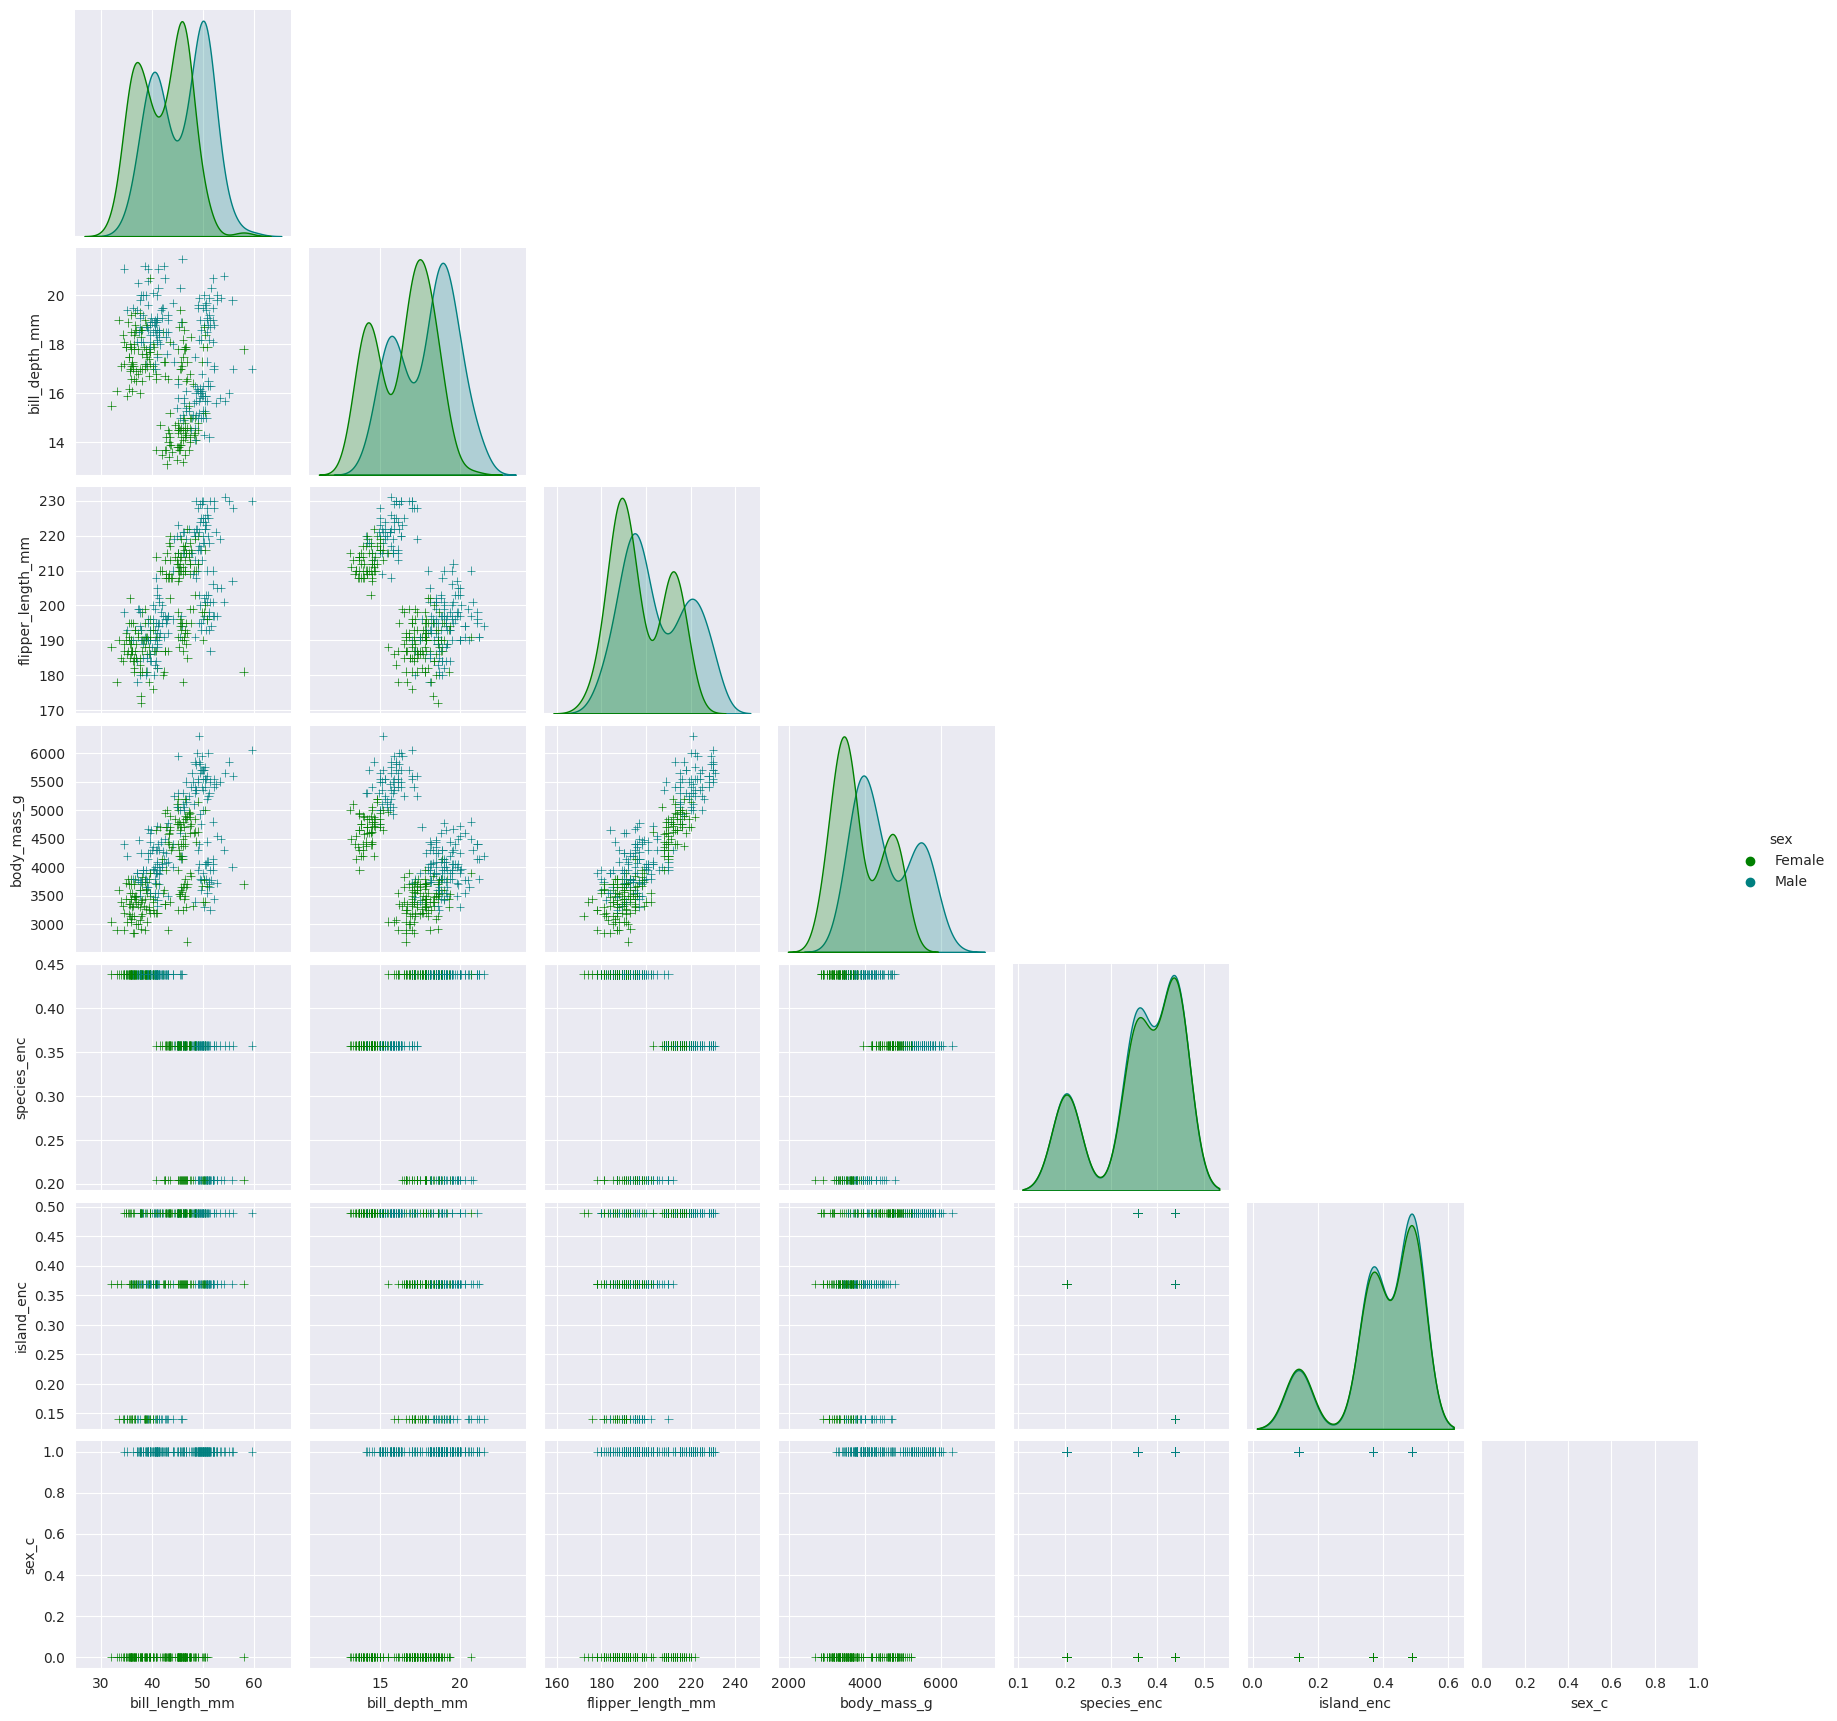

In [76]:
sns.color_palette("cubehelix", as_cmap=True)
sns.pairplot(df,corner=True,diag_kind="kde",hue="sex",markers="+",palette=["green","teal"]);

#### Visualizing Data according to "species"

In [89]:
df.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [94]:
df.groupby("species").mean().style.background_gradient()

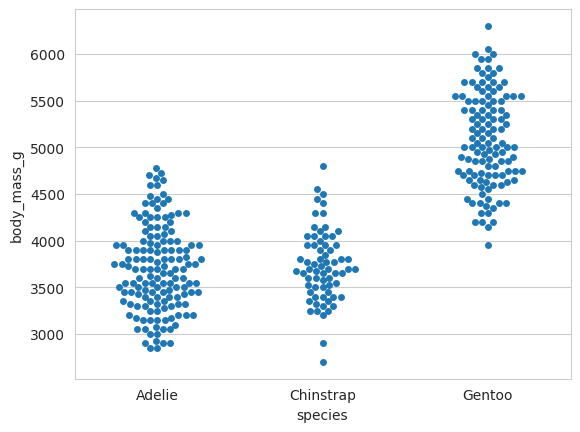

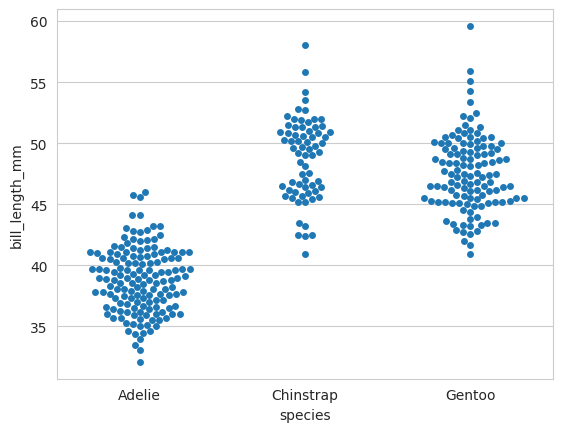

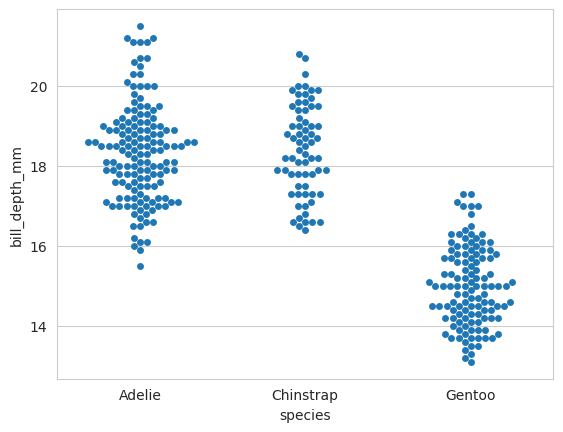

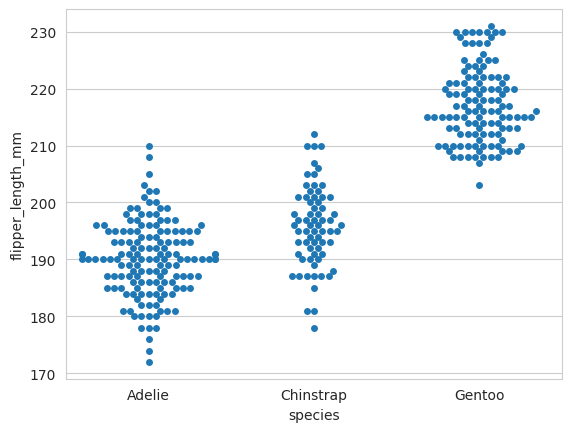

In [99]:
# matplotlib ile çoklu plot çizdir
for i in df[["body_mass_g","bill_length_mm","bill_depth_mm","flipper_length_mm"]].columns:
    plt.figure()
    sns.swarmplot(data=df,x="species",y=i)

### Preparing the Data for Machine Learning

In [11]:
x = df.drop(["species","island","sex","species_enc"],axis=1)
y = df.species

In [34]:
mms = MinMaxScaler()
x_scaled = mms.fit_transform(x)

In [35]:
x.shape

(333, 6)

In [36]:
input_data = Input(shape=(x.shape[1],))
encoded = Dense(100,activation="relu")(input_data)
encoded = Dense(75,activation="relu")(encoded)
encoded = Dense(25,activation="relu")(encoded)
encoded = Dense(6,activation="relu")(encoded)
decoded = Dense(25,activation="tanh")(encoded)
decoded = Dense(75,activation="tanh")(decoded)
decoded = Dense(100,activation="tanh")(decoded)

output_layer = Dense(x.shape[1],activation="relu")(decoded)
autoencoder = Model(input_data,output_layer)
autoencoder.compile(optimizer="adam",loss="mse")
hist = autoencoder.fit(x_scaled,x_scaled,batch_size=30,epochs=300,shuffle=True,validation_split=0.20)

Epoch 1/300
9/9 [==============================] - 1s 22ms/step - loss: 0.1756 - val_loss: 0.1045
Epoch 2/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0669 - val_loss: 0.0678
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0472 - val_loss: 0.0402
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0316 - val_loss: 0.0259
Epoch 5/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0256 - val_loss: 0.0184
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0207 - val_loss: 0.0149
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0160 - val_loss: 0.0084
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0134 - val_loss: 0.0061
Epoch 9/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0123 - val_loss: 0.0078
Epoch 10/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0109 - val_loss: 0.0066
Epoch 11/300
9/9 [==========

Epoch 82/300
9/9 [==============================] - 0s 6ms/step - loss: 9.4288e-04 - val_loss: 7.6525e-04
Epoch 83/300
9/9 [==============================] - 0s 6ms/step - loss: 9.6335e-04 - val_loss: 7.0206e-04
Epoch 84/300
9/9 [==============================] - 0s 6ms/step - loss: 9.5020e-04 - val_loss: 7.7863e-04
Epoch 85/300
9/9 [==============================] - 0s 7ms/step - loss: 9.3956e-04 - val_loss: 6.9826e-04
Epoch 86/300
9/9 [==============================] - 0s 7ms/step - loss: 9.7092e-04 - val_loss: 9.5182e-04
Epoch 87/300
9/9 [==============================] - 0s 6ms/step - loss: 9.3380e-04 - val_loss: 6.9893e-04
Epoch 88/300
9/9 [==============================] - 0s 6ms/step - loss: 8.9990e-04 - val_loss: 8.7175e-04
Epoch 89/300
9/9 [==============================] - 0s 6ms/step - loss: 9.3694e-04 - val_loss: 7.0701e-04
Epoch 90/300
9/9 [==============================] - 0s 6ms/step - loss: 9.1523e-04 - val_loss: 7.1071e-04
Epoch 91/300
9/9 [============================

Epoch 159/300
9/9 [==============================] - 0s 8ms/step - loss: 5.7582e-05 - val_loss: 1.1638e-04
Epoch 160/300
9/9 [==============================] - 0s 7ms/step - loss: 5.8215e-05 - val_loss: 8.8964e-05
Epoch 161/300
9/9 [==============================] - 0s 6ms/step - loss: 5.0294e-05 - val_loss: 1.0026e-04
Epoch 162/300
9/9 [==============================] - 0s 6ms/step - loss: 4.8117e-05 - val_loss: 1.2797e-04
Epoch 163/300
9/9 [==============================] - 0s 6ms/step - loss: 4.7830e-05 - val_loss: 6.4947e-05
Epoch 164/300
9/9 [==============================] - 0s 6ms/step - loss: 4.6276e-05 - val_loss: 9.2821e-05
Epoch 165/300
9/9 [==============================] - 0s 6ms/step - loss: 4.8900e-05 - val_loss: 8.7924e-05
Epoch 166/300
9/9 [==============================] - 0s 5ms/step - loss: 4.4781e-05 - val_loss: 7.8858e-05
Epoch 167/300
9/9 [==============================] - 0s 6ms/step - loss: 4.5915e-05 - val_loss: 1.1567e-04
Epoch 168/300
9/9 [==================

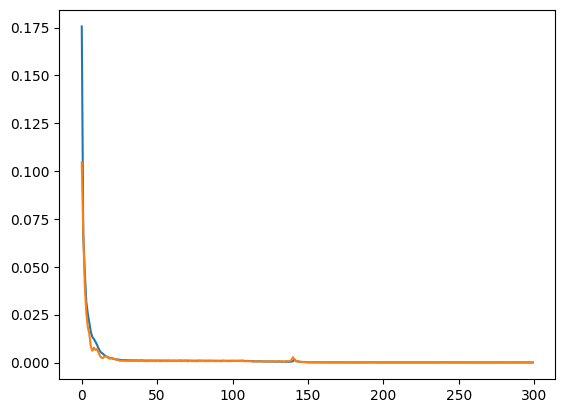

In [43]:
for i in hist.history.keys():
    plt.plot(hist.history[i])

In [44]:
hidden_layer = Sequential()
hidden_layer.add(autoencoder.layers[0])
hidden_layer.add(autoencoder.layers[1])
hidden_layer.add(autoencoder.layers[2])
hidden_layer.add(autoencoder.layers[3])
hidden_layer.add(autoencoder.layers[4])

x_enc = hidden_layer.predict(x_scaled)

11/11 [==============================] - 0s 2ms/step


In [45]:
hidden_layer.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               700       
                                                                 
 dense_9 (Dense)             (None, 75)                7575      
                                                                 
 dense_10 (Dense)            (None, 25)                1900      
                                                                 
 dense_11 (Dense)            (None, 6)                 156       
                                                                 
Total params: 10,331
Trainable params: 10,331
Non-trainable params: 0
_________________________________________________________________


In [46]:
x_train,x_test,y_train,y_test = train_test_split(x_enc,y,test_size=0.2,random_state=123)

In [47]:
lr = LogisticRegression()
model = lr.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(y_test,pred)

0.8805970149253731

In [48]:
model = lr.fit(x_test,y_test)
pred = model.predict(x_train)
accuracy_score(y_train,pred)

0.8984962406015038